In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
#import seaborn as sns

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


[Dimension reduction in scikit learn](http://scikit-learn.org/stable/modules/decomposition.html#decompositions)

In [2]:
prevpos_mnsz = pd.read_csv('./dat/preverb-posit-gyakmx-mnsz.tsv', delimiter='\t', index_col=0)
prevpos_regi = pd.read_csv('./dat/preverb-posit-gyakmx.tsv', delimiter='\t', index_col=0)

In [3]:
prevpos_regi.head()#.describe()

,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8
meg,0,0,2,1225,15,8343,3294,98,17,4,4,0,1,0
el,0,0,2,767,91,4211,1081,40,5,3,1,0,1,2
ki,0,0,1,260,28,1557,478,17,7,2,2,0,1,0
fel,0,1,0,185,26,940,403,16,4,2,2,0,0,0
be,0,0,0,109,12,815,310,14,2,1,0,0,0,0


In [4]:
def postproc_regi(prevpos):
    prevpos['-1'] += prevpos['0']
    prevpos['0'] = 0
    prevpos['6+'] = prevpos.loc[:,'+6':].sum(axis=1)
    prevpos = prevpos.drop(columns=['+6', '+7', '+8'])
    
postproc_regi(prevpos_regi)

In [5]:
prevpos_regi.head()

,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,6+
meg,0,0,2,1225,8358,0,3294,98,17,4,4,0,1,0,1
el,0,0,2,767,4302,0,1081,40,5,3,1,0,1,2,3
ki,0,0,1,260,1585,0,478,17,7,2,2,0,1,0,1
fel,0,1,0,185,966,0,403,16,4,2,2,0,0,0,0
be,0,0,0,109,827,0,310,14,2,1,0,0,0,0,0


In [6]:
def matshow_dframe(mutinfo):
    plt.matshow(mutinfo)
    plt.yticks(np.arange(0.5, len(mutinfo.index), 1), mutinfo.index)
    plt.xticks(np.arange(0.5, len(mutinfo.columns), 1), mutinfo.columns)
    plt.colorbar()
    #plt.xticks([int(posi) for posi in mutinfo.columns.tolist()])

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


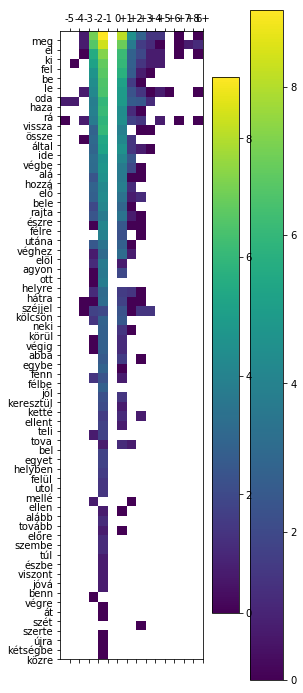

In [7]:
matshow_dframe(np.log(prevpos_regi))
#plt.yticks(prevpos.index.tolist())
plt.colorbar()

## Mutual information

In [8]:
def mutinfo(prevpos):
    mutinfo = prevpos.copy()#.values.astype('float')# + 1
    prev_marg = prevpos.sum(axis=1)
    posit_marg = prevpos.sum(axis=0)
    mutinfo = mutinfo.divide(prev_marg, axis='rows')
    mutinfo /= posit_marg#.values
    return np.log(mutinfo)

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


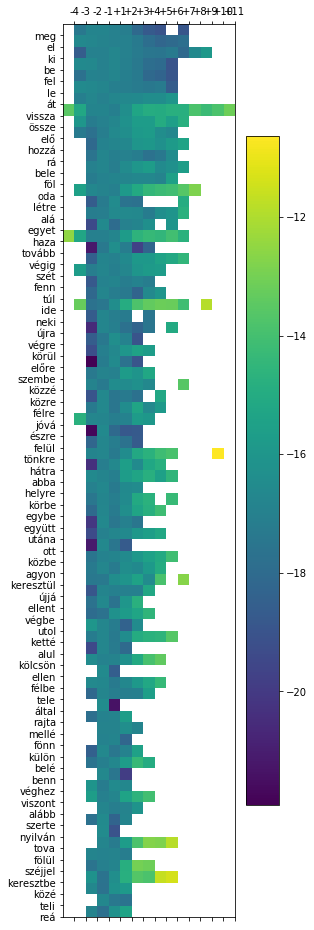

In [9]:
matshow_dframe(mutinfo(prevpos_mnsz))

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


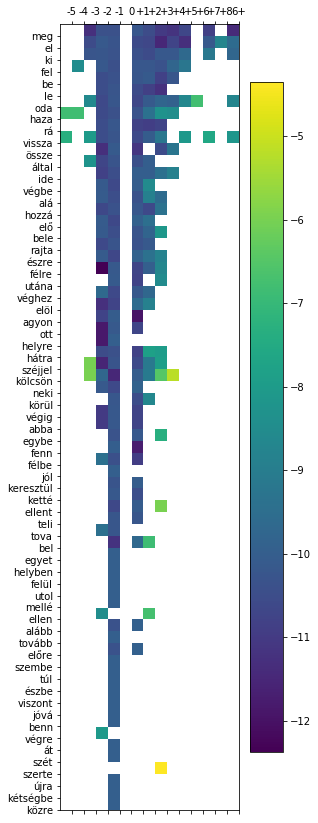

In [10]:
matshow_dframe(mutinfo(prevpos_regi))

## Tf-idf

In [60]:
def tfidf(prevpos, head=55, show=False):
    tit = TfidfTransformer()
    tfi = tit.fit_transform(prevpos.T).T
    if show:
        plt.matshow(tfi.todense()[:head])
        plt.yticks(np.arange(0.5, len(prevpos.index[:head]), 1), prevpos.index[:head])
        plt.xticks(np.arange(0.5, len(prevpos.columns[:head]), 1), prevpos.columns[:head])
        plt.colorbar()
    return tfi

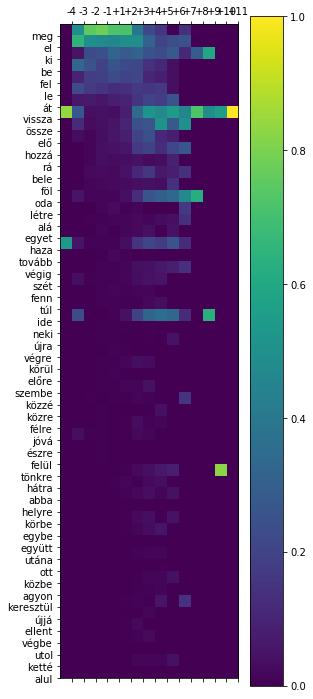

In [42]:
tfidf(prevpos_mnsz, show=True)

## Clustering

In [66]:
def pca_mutinfo(prevpos, weight='mutinfo'):
    pca = PCA(n_components=3)
    prevproj = pca.fit_transform(mutinfo(prevpos + 1) if weight=='mutinfo' else tfidf(prevpos).todense())
    plt.scatter(prevproj.T[0], prevproj.T[1], c=prevproj.T[2])
    for label, xy in zip(prevpos_mnsz.index, prevproj[:,:2]):
        plt.annotate(label, xy)

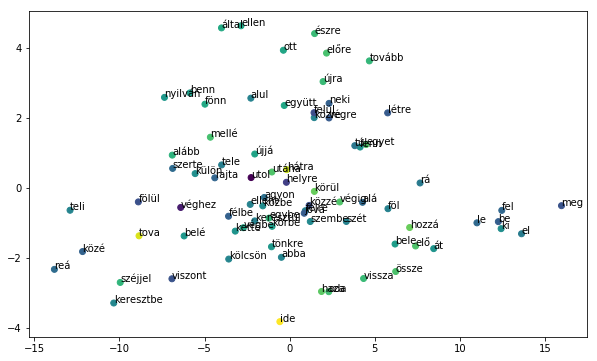

In [58]:
pca_mutinfo(prevpos_mnsz)

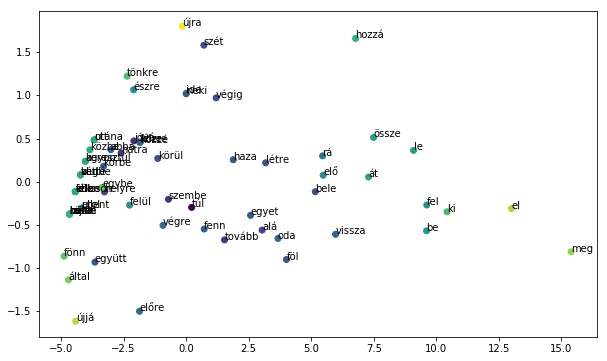

In [59]:
pca_mutinfo(prevpos_regi)

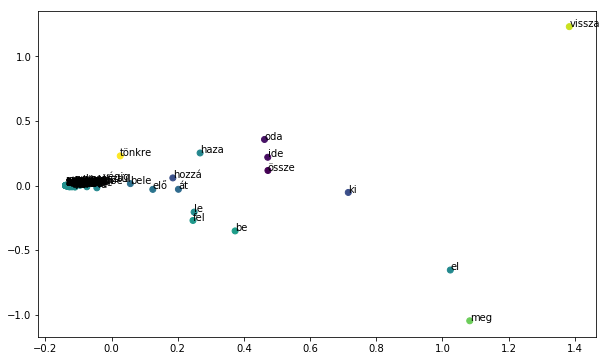

In [67]:
pca_mutinfo(prevpos_mnsz, weight='tfidf')

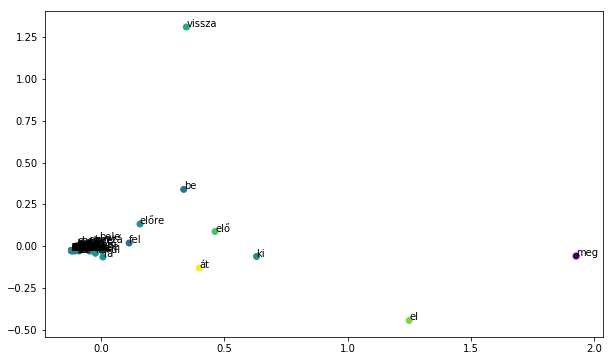

In [68]:
pca_mutinfo(prevpos_regi, weight='tfidf')